# 1. Networking, Conceptos basicos

### 1. Redes de datos (networking)
- Su uso permite la comunicacion *entre programas en la misma maquina*, o *entre maquinas distintas*

### 2. Comunicacion entre computadores


- Se necesita:

1. Un **medio** de transmision de datos. Alambricos: Cables telefonicos, ethernet. Inalambricos: WiFi, señales telefonicas
2. **Destinatario** : saber con que maquina nos queremos comunicar -> Direcciones IP
3. **Protocolo de transmision** de mensajes: conjunto de reglas para lograr la emision y recepcion de un mensaje, entre dos programas. Protocolos TCP o UDP
4. **Protocolo de aplicaccion**: conjunto de reglas para lograr la comunicacion efectiva de informacion. Orden, formato y contenido. Protocolos HTTP, DNS, SMTP.

### 3. Identificacion de entidades en la Internet - *hosts* y *direcciones IP*

- **host**: maquina que ejecuta programas capaces de comunicarse en el exterior mediante emision y recepcion de datos.

Todos los *hosts* se identifican mediante una **direccion IP**

#### 3.1 Direcciones IP

- Numero unico para distinguir a los hosts en la red. Permite al **router** encontrar al **Destinatario** para hacer llegar el mensaje emitido al *host* correcto
- Los ISP (*Internet Servide Provider*) se encargan de que estos numeros sean unicos en todo el mundo

- Existen dos versiones para la IP
    1. **IPv4**. Numero de 4 *bytes* (32 bits), donde cada *byte* es separado por un punto y mostrado en base 10 (decimal) para poder ser leido facilmente. Ej: `192.30.253.112`

    2. **IPv6**. Numero 128 bits surgido por la insuficiencia de numeros provistos por la version anterior. Se escribe como grupos de 16 bits separados por `:` donde cada grupo es mostrado en hexadecimal. Ej: `2001:0db8:85a3:0000:0000:8a2e:0370:7334`

#### 3.2 Nombres de las direcciones IP

Se necesita un protocolo que traduzca las direcciones IP a un **nombre** facil de recordar
- **DNS** (*Domain Name Service*): Protocolo que mantiene un registro de direcciones IP de forma **jerarquica**

- Una direccion web se puede ir separando en dominios cada vez mas grande

#### 3.3 Puertos

Como en un *host* se ejecutan diferentes programas a la vez, y mas de uno necesita enviar/recibir data hacia/desde otro *host*, se necesitan varios **puertos** para comunicarse

- Edificio donde viven multiples **ports** que comparten la misma *direccion IP*

- **Puerto**: Numero de 16 bits. Cada aplicacion puede usar uno o mas puertos en un host
- Solo un programa puede estar utilizando un puerto a la vez.
- Para los servidores, existen convenciones para recibir solicitudes de clientes desde la web. El navegador puede enviar esta solicitud desde cualquier puerto en su *host*

Normalmente, los servidores reciben las solicitudes en puertos predefinidos. En la tabla de abajo, hay algunos ejemplos.

| Puerto | Descripción servidor     |
| ------ | ------------------------ |
| 21     | FTP                      |
| 22     | SSH                      |
| 25     | SMTP (email)             |
| 37	 | Time                     |
| 53	 | Domain Name System (DNS) |
| 80     | HTTP (web)               |
| 110    | POP3 (email)             |
| 443    | HTTPS (web)              |

### 4. Protocolos de transmision - TCP y UDP

Protocolos para transmitir datos desde un **programa emisor**, hacia un **programa receptor**

- los datos son bytes serializados
- Podemos dividir el mensaje en **paquetes** de datos, para minimizar los errores
- Cada paquete contiene una etiqueta formada por la *direccion IP* y *el puerto destinatario*, ademas de la posicion dentro del mensaje original. Cuando el destinatario reciba todos los paquetes, puede reconstruir el mensaje original 

#### 4.1 TCP (*Transmission Control Protocol*)

Protocolo para enviar y recibir un *stream* (flujo) de bytes serializados de forma **confiable** al **Destinatario**

- todos los paquetes llegan de manera integra: 
    1. Se confirma que cada paquete no fue modificado en la transmision
    2. Se solicita la confirmacion de recepcion de del paquete integro
    3. Se retransmiten aquellos paquetes perdidos o dañados

    


Primero es necesario establecer una conexion entre el emisor y receptor: **hanshake**, acá se se acuerdan los parametros de conexion (tiempo espera, cantidad de paquetes a enviar al mismo tiempo, memoria, etc) -> TCP es un protocolo orientado a la conexion (**Connection oriented**)

- Esto se hace para garantizar la fiabilidad de la transmision, pero a cambio existe un tiempo de demora (**Latencia**) en la transmision

- Protocolos de aplicacion (HTTP para web, SMTP para correo, BitTorrent para transferir archivos) usan TCP para *asegurar una transferiencia sin errores*

#### 4.2 UDP (*User Datagram Protocol*)

Protocolo **sin garantias de envio integro**. No se preocupa que un paquete (*datagrama*) no llegue o llegue con errores -> *best-effort* sin certezas

- Protocolo **connectionless**, no existe acuerdo previo entre emisor y receptor, no hay *handshake*

Lo anterior convierte a UDP en un protocolo mas liviano que TCP, y es usado para transmisiones que privilegian velocidad por sobre integridad

Ej: transmision de audio y video, la perdida de algunos pocos *bytes* solo se nota en videos mas pixelados, perdida de cuadros o audios con chasquidos. Pero a cambio la velocidad de carga de los videos es mucho mas rapida y la diferencia de calidad no es tan apreciable

### 5. Encapsulamiento de la comunicacion

Podemos dividir conceptualmente la comunicacion entre dos *hosts* en **capas**, donde cada una es responsable de un aspecto de la comunicacion y confia en el correcto funcionamiento de la anterior.

Existen dos modelos

![Alt text](imgs/9_capas.png)

Nuestros programas en Python funcionarán en la **capa de aplicacion** y se utilizara un **protocolo de transmision/transporte** (TCP, UDP) provisto por el OS

# 2. Networking con Python

## Arquitectura cliente-servidor

Manera de conectar dos o mas programas, donde uno actua como el **servidor** ofrece servicios a otros programas **clientes**, quienes efectuan solicitudes al servidor

- El cliente es quien **inicia la conexion** con el **servidor** de acuerdo a un **protocolo**

- El servidor **espera y escucha** conexiones entrantes de clientes y reacciona a ellas (aceptarlas o no, efectuar alguna accion y enviar respuestas al cliente)

- La transmision de informacion de hace via los **protocolos de transmision** (TCP o UDP)

## *Sockets*

Objeto del OS, que permite a un programa **transmitir y recibir datos** desde y hacia otro programa (contenido en otra maquina o en la misma maquina pero en otro puerto)

- Pensarlo como el punto de in/out hacia/desde la red 

- Es necesario especificar el tipo de direccion IP y el protocolo de transmision

### En Python

En Python, los *sockets* son provistos por el módulo `socket`. Para crear un *socket*, debemos crear una instancia de la clase `socket(family, type)`, donde `family` es el tipo de dirección IP que usaremos, y `type` es el protocolo de transporte. Algunos de los valores permitidos son:

- `family`
    - `AF_INET` para direcciones IPv4
    - `AF_INET6` para direcciones IPv6
- `type`
    - `SOCK_STREAM` para TCP
    - `SOCK_DGRAM` para UDP


```python
# ejemplo
import socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
```

### Cliente TCP

- Para conectarse a un servidor TCP usamos el metodo `connect((host, port))`

    - `host` es la direccion IP del *host* **destinatario**. String con el *hostname* o si se usa una direccion IP, el sistema usa el protocolo DNS para hallar el nombre correspondiente
    
    - `port` es el puerto del *host* **destinatario**.
        - El puerto 80, usado por los servidores, es un servicio de **texto plano** (sin encriptacion)
        - Servidores modernos usan el puerto 443, donde funciona HTTP con encriptacion (HTTPS)

#### Envio de mensaje

Los sockets solo transmiten bytes. Por lo que los mensajes deben ser codificados previamente. Tenemos dos metodos para enviar bytes

- `send(bytes)`: envia el mensaje en la variabe. Retorna la cantidad de bytes que fue efectivamente enviada. Uno se debe encargar de llamar nuevamente para enviar los bytes restantes

- `sendall(bytes)`: asegura de enviar todos los bytes usando el metodo anterior. En caso de haber un error en el envio, el metodo lanza un error <- no nos permite saber cuantos bytes efectivamente se enviaron previo al error

- Para saber que nos respondio el servidor, usamos el metodo `recv(buffer)`
    - retorna un objeto `bytes` que puede ser decodificado
    - `buffer` es la cantidad maxima de bytes que sera leida al momento de haber llamado al metodo. Colocar una potencia de 2 pequeña

- cerrar la conexion con `close()` para no ocupar recursos que no seran utilizados

#### Manejo de errores

La clase `ConnectionError` es la clase que podemos capturar para responder a cualquier problema

#### Ejemplo - `iic2333_ejemplo.py`

```python
import socket

# 1. IPv4 y bajo protocolo TCP
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Necesetimamos la direccion IP del host destinatario y el puerto del host destinatario

host = 'iic2333.ing.puc.cl'
port = 80  # servicio de texto plano

try:
    # 2. establecer conexion
    sock.connect((host, port))

    # envio de un mensaje en formato HTTP, codificado en utf-8
    sock.sendall(
        'GET / HTTP/1.1\nHost: iic2333.ing.puc.cl\n\n'.encode('utf-8'))

    # recibimos lo que respondio el server
    data = sock.recv(4096)
    print(data.decode('utf-8'))

except ConnectionError as err:
    # ConnectionError es la clase base de BrokenPipeError, ConnectionAbortedError,
    # ConnectionRefusedError y ConnectionResetError
    print('Ocurrio un error')

finally:
    # 3. Cerrar la conexion
    sock.close()

"""
Obtenemos una HTTP Response que contiene 4096 bytes, donde viene el codigo HTML
que describe a la pagina iic2333.ing.puc.cl

- el puerto 80 es un servicio de texto plano (sin encriptacion)
"""
```

### Servidor TCP

El servidor debe escuchar las conexiones que le llegan a un puerto especifico. Para ello de debe enlazar un socket a un puerto con el metodo `bind((host, port))`

- Obtener el hostname de la maquina actual: `sock.gethostname()`

- Enlazar socket a un puerto: `sock.bind((host, port))`

- Escuchar conexiones: `sock.listen()`

- Aceptar conexiones: `sock.accept()`. Se retorna el socket del cliente y la direccion del cliente (tupla con la IP el puerto). Este metodo espera hasta que halla una conexion entrante. Si no hay conexion, el programa se cierra

- Cuando se quiera cerrar al programa servidor, se cierra el socket que acepta las conexiones

#### Ejemplo - Servidor que escucha y acepta conexiones

```python
import socket

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# obtenemos el nombre del host
host = socket.gethostname()  # DanielVC en esta maquina
port = 9000  # queremos escuchar en el puerto 9000

# enlazamos el socket al puerto
sock.bind((host, port))

# comenzamos a escuchar conexiones
sock.listen()

# aceptar conexiones
while True: # aqui van condiciones de cierre de conexion
    socket_cliente, address = sock.accept()
    print("Conexion aceptada desde", address)
    socket_cliente.sendall("Gracias por conectarse\n".encode("utf-8"))
    socket_cliente.close()
```

# 3. Apuntes de los ejemplos

## 1. Envio de bytes

1. Podemos enviar por partes el mensaje con `send()` para asegurarnos que se envie correctamente

```python
# Ciclo con send(), sacado de emisorV2.py

# leer archivo (ya existente)
with open('testfiles/enviar.bin', 'rb') as binfile:
    # 1. obtener largo y enviar al receptor
    datos = binfile.read()
    largo_archivo = len(datos)

    print(f'> EmisorV2: A enviar un archivo de {largo_archivo} bytes')

    # envio de 4 bytes que señalan el tamaño
    bytes_a_enviar = largo_archivo.to_bytes(4, byteorder='big')
    sock.sendall(bytes_a_enviar)

    # 2. Envio de archivo por chunks
    # Se usa send() en vez de sendall, para asegurarse que el archivo se envie correctamente
    # Recordar que send() retorna la cantidad de bytes correctamente enviados
    bytes_enviados = 0

    while bytes_enviados < largo_archivo:

        # se envia el mensaje cortado desde el ultimo punto efectivamente enviado
        bytes_enviados += sock.send(datos[bytes_enviados:])
```

2. O podemos enviarlo entero con `sendall()`

```python
def send(self, msg):
    """
    Envia mensajes al servidor

    Primero se envia el largo del mensaje en 4 bytes
    Luego se envia completo con sendall(), pero se puede usar tambien send() en un ciclo para
    asegurar que toda la informacion se enviara correctamente
    """

    msg_bytes = msg.encode()
    msg_length = len(msg_bytes).to_bytes(4, byteorder='big')

    # envio altiro el largo + mensaje
    self.socket_client.sendall(msg_lenght + msg_bytes)
```

## 2. Lectura de bytes al otro lado
La lecura se debe hacer de a *chunks*, para no sobrecargar a la funcion `recv`

```python
# ejemplo de un cliente con un socket_client

while True:
    response_bytes_length = self.socket_client.recv(4)
    response_length = int.from_bytes(response_bytes_length, 'big')

    response = bytearray()

    # recibimos datos en chunks de maximo 4096 bytes hasta llegar a la cantidad
    # de datos señalada por los primeros 4 bytes del mensaje del servidor

    while len(response) < response_length:
        read_length = min(4096, response_length - len(response))
        bytes_recieved = self.socket_client.recv(read_length)
        response.extend(bytes_recieved)

```

Este metodo se puede implementar bidireccionalmente (server a cliente) (cliente a servidor) para intercambiar respuestas

# Apuntes clases

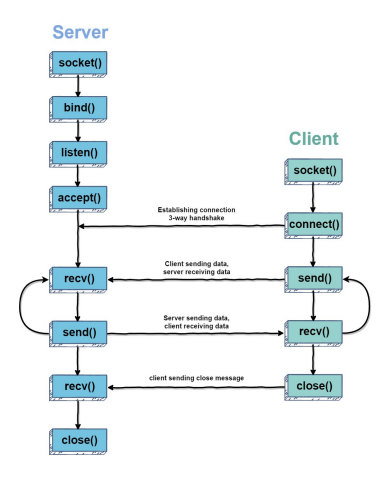